In [1]:
import shap
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X,y = iris(display=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
len(y)#list

150

In [7]:
import pandas as pd

In [9]:
y = pd.Series(y)
y.shape

(150,)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [11]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [12]:
y_train.value_counts(normalize=True)

virginica     0.333333
setosa        0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [14]:
#encode the target
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [15]:
y_test

array([0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 2])

In [20]:
#fit the model on training data
rf = RandomForestClassifier(random_state=42,max_depth=5,n_estimators=10)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
#Predi tion on data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [22]:
#Accuracy score
print(f"accuracy_score(Train) : {accuracy_score(y_train,y_pred_train)}")
print(f"accuracy_score(Test) : {accuracy_score(y_test,y_pred_test)}")

accuracy_score(Train) : 1.0
accuracy_score(Test) : 0.9333333333333333


In [29]:
#Create Explainer
explainer = shap.TreeExplainer(model = rf , data = X_train.iloc[0:51,:], model_output= "probability")

In [30]:
#base value
explainer.expected_value

array([0.31372549, 0.3545098 , 0.33176471])

In [33]:
#Calculate value base values manually
rf.predict_proba(X_train).shape

(120, 3)

In [35]:
rf.predict_proba(X_train.iloc[0:51,:]).mean(axis=0)

array([0.31372549, 0.3545098 , 0.33176471])

In [36]:
#Create Explainer
explainer = shap.TreeExplainer(model = rf , data = X_train, model_output= "probability")

In [37]:
#calculate sharply values
shap_values = explainer(X_test,y_test)

In [39]:
#shap_values

In [43]:
type(X_test.iloc[0])

pandas.core.series.Series

In [46]:
test_case = X_test.iloc[0:1,:]
test_case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2


In [47]:
shap_values = explainer(test_case)

In [51]:
prediction = rf.predict(test_case)
prediction_prob = rf.predict_proba(test_case)

print(prediction)
print(prediction_prob)

[0]
[[1. 0. 0.]]


In [52]:
le.inverse_transform(prediction)

array(['setosa'], dtype=object)

In [54]:
#calculate sharply values
shap_values = explainer(X_test.iloc[0:1,:],y_test)
shap_values

.values =
array([[[ 0.065     , -0.11790556,  0.05290556],
        [-0.0025    ,  0.02129167, -0.01879167],
        [ 0.2595    , -0.07193889, -0.18756111],
        [ 0.36900001, -0.16103056, -0.20796945]]])

.base_values =
array([[0.309     , 0.32858333, 0.36241667]])

.data =
array([[4.4, 3.2, 1.3, 0.2]])

In [55]:
shap_values.base_values

array([[0.309     , 0.32858333, 0.36241667]])

In [56]:
explainer.expected_value

array([0.309     , 0.32858333, 0.36241667])

In [58]:
test_case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2


In [57]:
shap_values.data

array([[4.4, 3.2, 1.3, 0.2]])

In [60]:
shap_values.shape #1= number of input 4 = input feature 3= no of classes

(1, 4, 3)

In [61]:
shap_values

.values =
array([[[ 0.065     , -0.11790556,  0.05290556],
        [-0.0025    ,  0.02129167, -0.01879167],
        [ 0.2595    , -0.07193889, -0.18756111],
        [ 0.36900001, -0.16103056, -0.20796945]]])

.base_values =
array([[0.309     , 0.32858333, 0.36241667]])

.data =
array([[4.4, 3.2, 1.3, 0.2]])

In [62]:
shap_values[0,:,0]

.values =
array([ 0.065     , -0.0025    ,  0.2595    ,  0.36900001])

.base_values =
np.float64(0.30899999999999994)

.data =
array([4.4, 3.2, 1.3, 0.2])

In [64]:
len(shap_values[0,:,0])

4

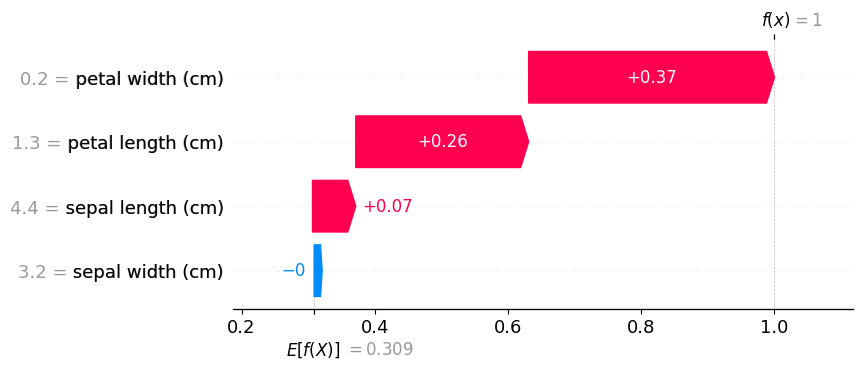

In [65]:
shap.waterfall_plot(shap_values[0,:,0])

In [ ]:
shap_values[0,:,0].base_values

np.float64(0.30899999999999994)

In [67]:
shap_values[0,:,0].values

array([ 0.065     , -0.0025    ,  0.2595    ,  0.36900001])

In [68]:
(shap_values[0,:,0].base_values + shap_values[0,:,0].values.sum()).round

<function float64.round>

In [69]:
import matplotlib.pyplot as plt

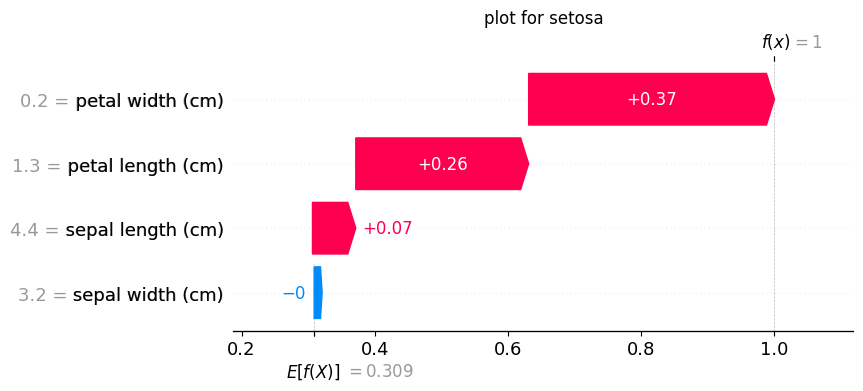

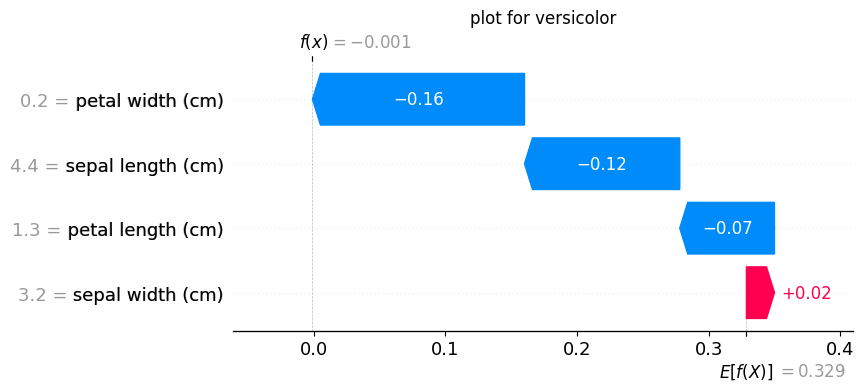

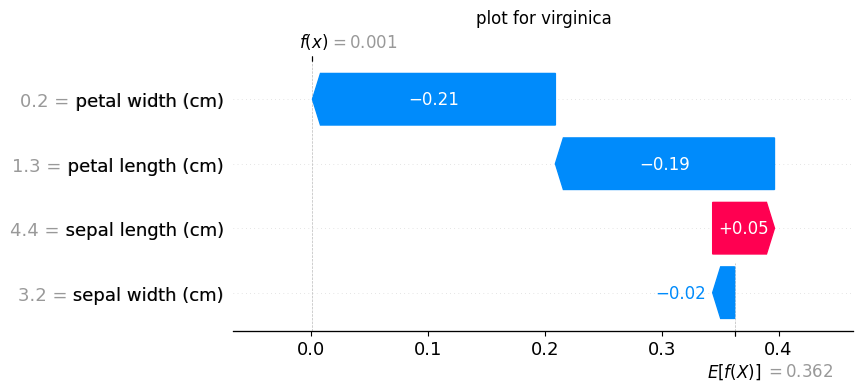

In [70]:
for i in range(len(le.classes_)):
    plt.title(f"plot for {le.classes_[i]}")
    shap.waterfall_plot(shap_values[0,:,i])